## ELMo результаты
- Результаты тестирования социальных сетей извлечённых с помощью предобученной модели ELMo
- Код генерации социальных сетей
- образцы полученных эмбедингов визуализированные с помощью TSNE 

AGGREGATED RESULTS: Model asoif_elmo_allbooks_layer1 : CF-favorite is number one choice: 6.666666666666667 , CF-favorite is in top2: 20.0  
AGGREGATED RESULTS: Model asoif_elmo_allbooks_layer23 : CF-favorite is number one choice: 6.666666666666667 , CF-favorite is in top2: 13.333333333333334  
AGGREGATED RESULTS: Model asoif_elmo_allbooks_alllayers : CF-favorite is number one choice: 6.666666666666667 , CF-favorite is in top2: 16.666666666666664  
AGGREGATED RESULTS: Model asoif_elmo_firstbook_alllayers : CF-favorite is number one choice: 16.666666666666664 , CF-favorite is in top2: 20.0  



DETAILED RESULTS (DEFAULT): Model asoif_elmo_allbooks_layer1 : simple aggreement betw CF (gold standard) and model: 10.0  
DETAILED RESULTS (DEFAULT): Model asoif_elmo_allbooks_layer23 : simple aggreement betw CF (gold standard) and model: 11.666666666666666  
DETAILED RESULTS (DEFAULT): Model asoif_elmo_allbooks_alllayers : simple aggreement betw CF (gold standard) and model: 11.666666666666666  
DETAILED RESULTS (DEFAULT): Model asoif_elmo_firstbook_alllayers : simple aggreement betw CF (gold standard) and model: 13.333333333333334  



DETAILED RESULTS (PLUS_N):  Model asoif_elmo_allbooks_layer1 : simple aggreement betw CF (gold standard) and model: 15.0  
DETAILED RESULTS (PLUS_N):  Model asoif_elmo_allbooks_layer23 : simple aggreement betw CF (gold standard) and model: 15.0  
DETAILED RESULTS (PLUS_N):  Model asoif_elmo_allbooks_alllayers : simple aggreement betw CF (gold standard) and model: 15.0  
DETAILED RESULTS (PLUS_N):  Model asoif_elmo_firstbook_alllayers : simple aggreement betw CF (gold standard) and model: 16.666666666666664  



In [1]:
import h5py
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from itertools import chain

%matplotlib inline

In [17]:
char_data = [['Robert', 126],
             ['Jon', 111],
             ['Robb', 104],
             ['Jaime', 98],
             ['Cersei', 96],
             ['Sansa', 96],
             ['Joffrey', 95],
             ['Tywin', 86],
             ['Tyrion', 84],
             ['Stannis', 80],
             ['Catelyn', 75],
             ['Bran', 74],
             ['Arya', 72],
             ['Ned', 68],
             ['Renly', 68],
             ['Hound', 57],
             ['Varys', 49],
             ['Lysa', 47],
             ['Tommen', 46],
             ['Pycelle', 45],
             ['Balon', 43],
             ['Loras', 41],
             ['Theon', 40],
             ['Petyr', 40],
             ['Edmure', 37],
             ['Barristan', 35],
             ['Roose', 35],
             ['Margaery', 32],
             ['Hoster', 31],
             ['Myrcella', 31],
            ]

In [18]:
chars = [c[0] for c in char_data]

In [6]:
embedding_files = '/media/data/Diploma data/elmo_layers%d.hdf5'
tokenized_text_files = "/home/konstantin/Downloads/dataset_file%d.txt"

In [10]:
def load_data(embedding_files,
              tokenized_text_files,
              num = 1,
             ):
    raw_embs = []
    for i in range(num):
        raw_embs.append(h5py.File(embedding_files %(i+1), 'r'))
        
    texts = []
    for i in range(num):
        with open(tokenized_text_files %(i+1), 'r') as f:
            text = f.read().split("\n")
        texts.append([t.split() for t in text])
    
    return raw_embs, texts

In [34]:
def collect_char_vectors(raw_embs,
                         texts,
                         chars,
                         text_ids = None,
                         layers_ids = None,
                        ):
    if text_ids is None:
        text_ids = [i for i in range(len(texts))]
    
    if layers_ids is None:
        layers_ids = [0,1,2]

    char_emb = dict(zip(chars, [[] for i in range(len(chars))]))

    for i, curd in enumerate(texts):
        if i not in text_ids:
            continue

        for j, sent in tqdm(enumerate(curd)):
            for k, token in enumerate(sent):
                if token not in chars:
                    continue

                emb_temp = []
                for l in layers_ids:
                    emb_temp.append(raw_embs[i][str(j)][l][k])

                char_emb[token].append(np.array(emb_temp).mean(axis = 0))
    return char_emb

In [42]:
def save_model(path, char_emb):
    with open(path, 'w') as fout:
        fout.write(f'{len(char_emb)} {len(list(char_emb.values())[0][0])}\n')
        for key,e in char_emb.items():
            fout.write(f"{key} {' '.join(map(str, np.array(e).mean(axis = 0)))} \n")

In [51]:
def tsne_plot(char_emb,
              chnames = ["Robert", "Catelyn", "Sansa", "Ned"],
              cols = ['r', 'b', 'k', 'm'],              
             ):
    tsne_model = TSNE(perplexity=10, n_components=2, init='random', n_iter=500)
    
    lens = [len(char_emb[name]) for name in chnames]
    colarray = []
    ind = 0
    
    
    new_values = tsne_model.fit_transform(list(chain.from_iterable([char_emb[name] for name in chnames])))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        for k in range(len(chnames)):
            if ind < sum(lens[:k+1]):
                colarray.append(cols[k])
                break
        ind += 1
        
    plt.figure(figsize=(18, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],c=colarray[i])
    plt.show()

### 5 книг 1ый слой

In [48]:
text_ids = [0,1,2,3,4,]
layers_ids = [0]
model_path = "asoif_elmo_allbooks_layer1.model"

In [ ]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids, layers_ids = layers_ids)
save_model(model_path, char_emb)

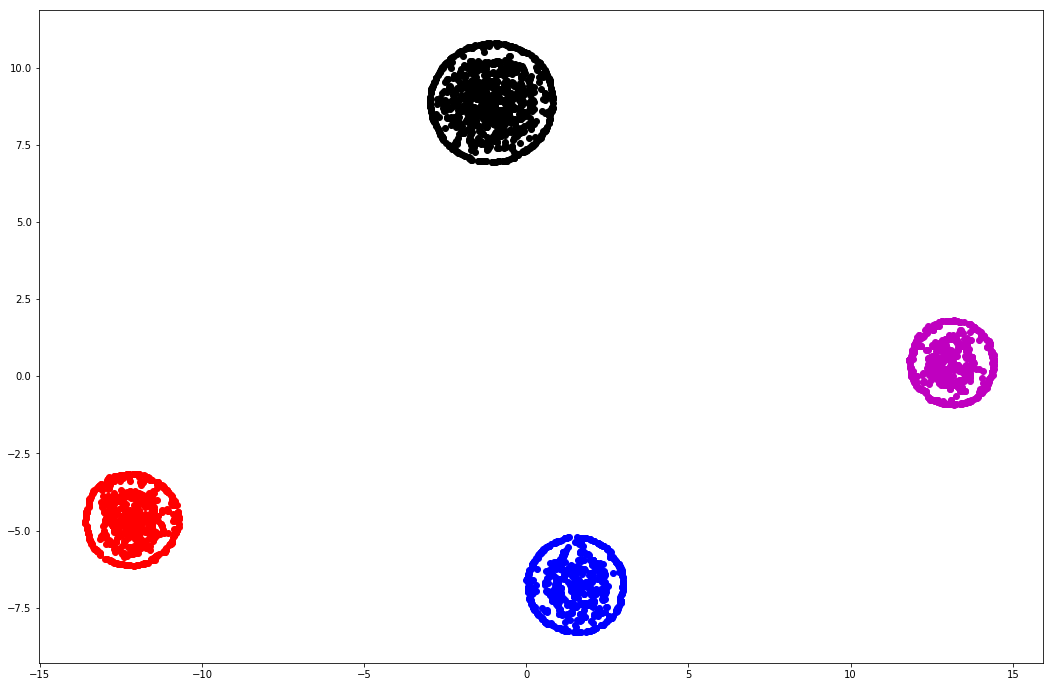

In [52]:
tsne_plot(char_emb)

### 5 книг 2-3 слои

In [53]:
text_ids = [0,1,2,3,4,]
layers_ids = [1,2]
model_path = "asoif_elmo_allbooks_layer23.model"

20787it [00:32, 633.77it/s]
21811it [00:43, 505.28it/s]
36961it [00:45, 805.85it/s]
21228it [00:18, 1161.40it/s]
29431it [00:29, 1007.22it/s]


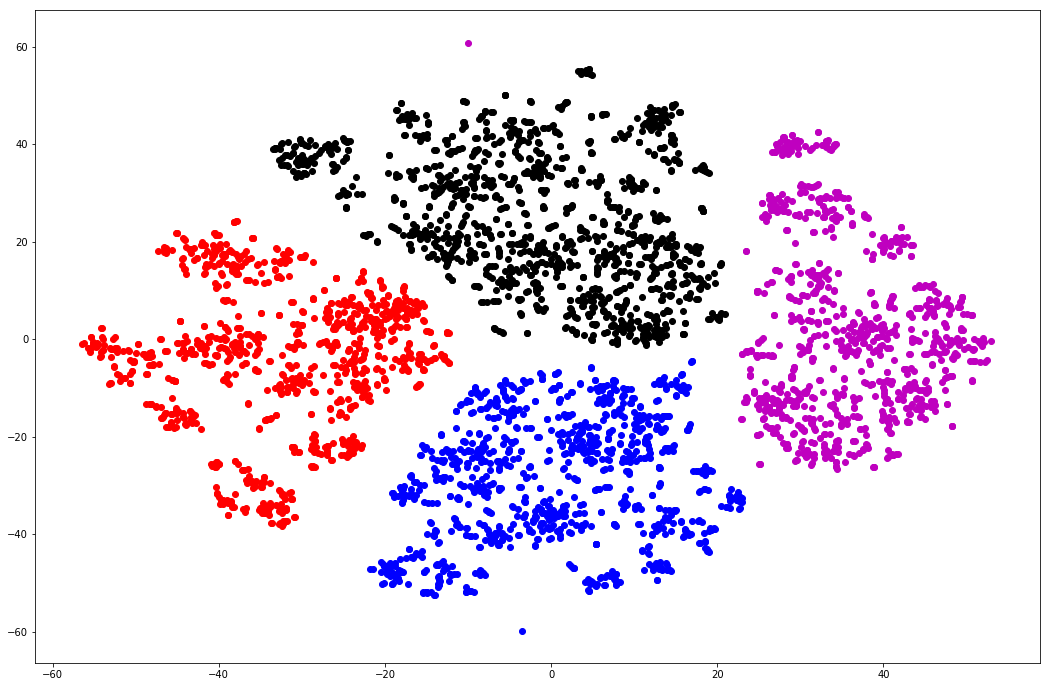

In [54]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids, layers_ids = layers_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### 5 книг все слои

In [55]:
text_ids = [0,1,2,3,4,]
layers_ids = [0,1,2]
model_path = "asoif_elmo_allbooks_alllayers.model"

20787it [00:44, 466.53it/s]
21811it [00:39, 558.27it/s]
36961it [00:53, 692.33it/s]
21228it [00:25, 822.86it/s]
29431it [00:34, 858.35it/s]


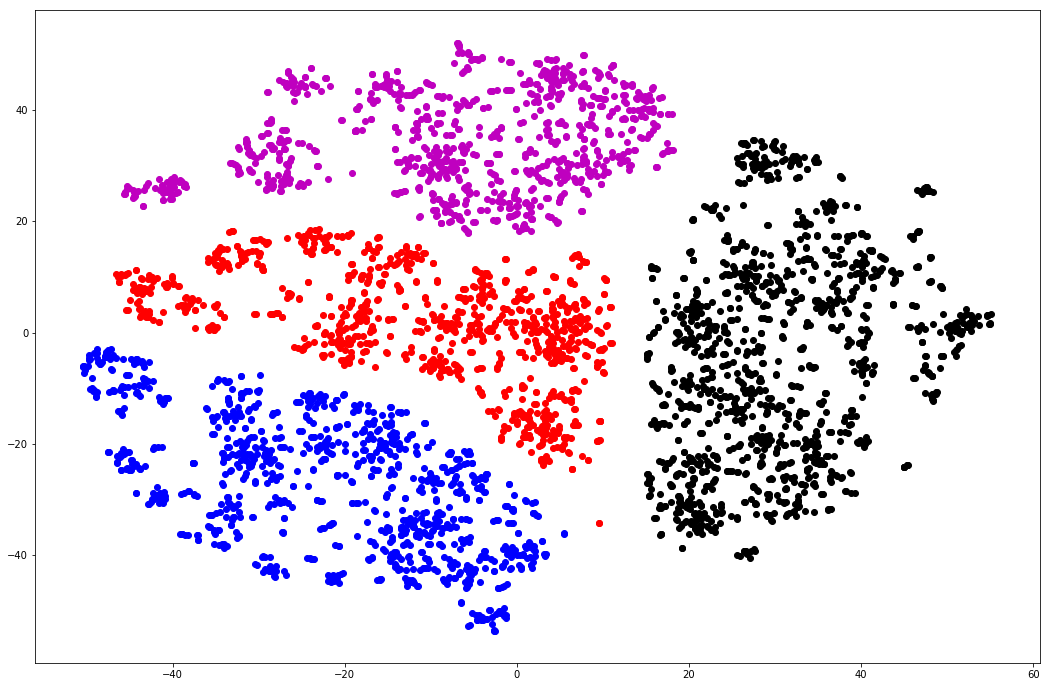

In [56]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids, layers_ids = layers_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### 1 книга все слои

In [57]:
text_ids = [0,]
layers_ids = [0,1,2]
model_path = "asoif_elmo_firstbook_alllayers.model"

20787it [00:50, 415.45it/s]


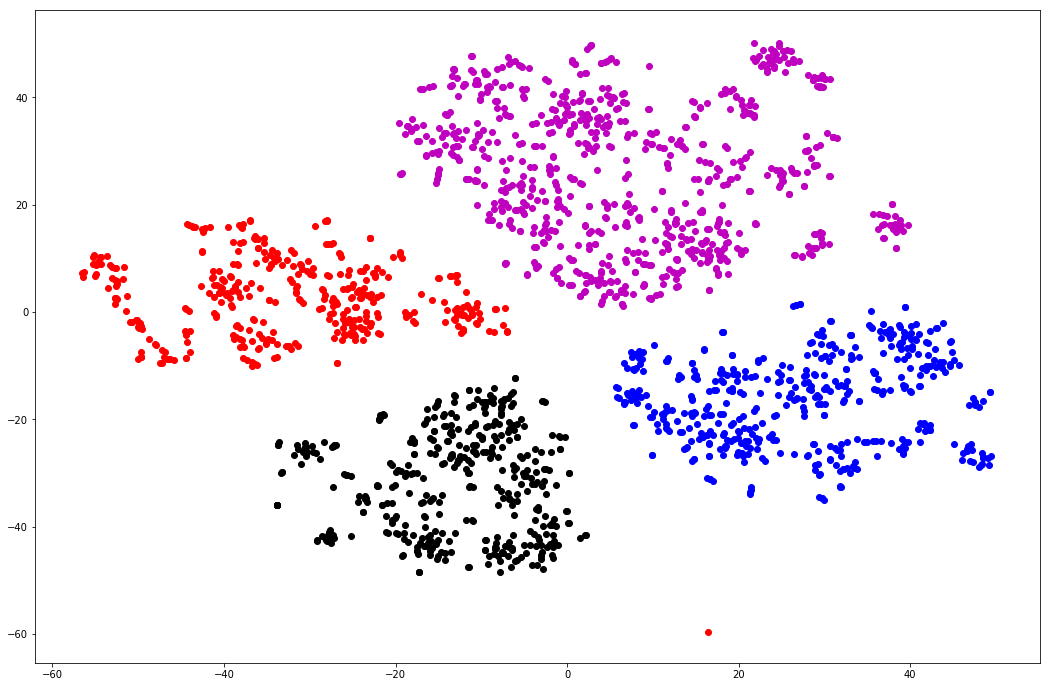

In [58]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 1)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids, layers_ids = layers_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### Три слоя для одного персонажа

In [65]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)

In [66]:
from tqdm import tqdm

char_emb1 = dict(zip(chars, [[] for i in range(len(chars))]))
char_emb2 = dict(zip(chars, [[] for i in range(len(chars))]))
char_emb3 = dict(zip(chars, [[] for i in range(len(chars))]))

for i, curd in enumerate(texts):
    for j, sent in tqdm(enumerate(curd)):
        for k, token in enumerate(sent):
            if token in chars:
                char_emb1[token].append((raw_embs[i][str(j)][0][k]))
                char_emb2[token].append((raw_embs[i][str(j)][1][k]))
                char_emb3[token].append((raw_embs[i][str(j)][2][k]))
            

20787it [00:31, 652.07it/s]
21811it [00:52, 412.22it/s]
36961it [01:02, 588.00it/s]
21228it [00:31, 672.98it/s]
29431it [00:39, 741.12it/s]


In [67]:
    tsne_model = TSNE(perplexity=10, n_components=2, init='random', n_iter=500)
    cols = ['r', 'b', 'k', 'm']
    lens = [len(char_emb1["Robert"]) for i in range(3)]
    colarray = []
    ind = 0
    
    
    new_values = tsne_model.fit_transform(char_emb1["Robert"]+char_emb2["Robert"]+char_emb3["Robert"])

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        for k in range(4):
            if ind < sum(lens[:k+1]):
                colarray.append(cols[k])
                break
        ind += 1

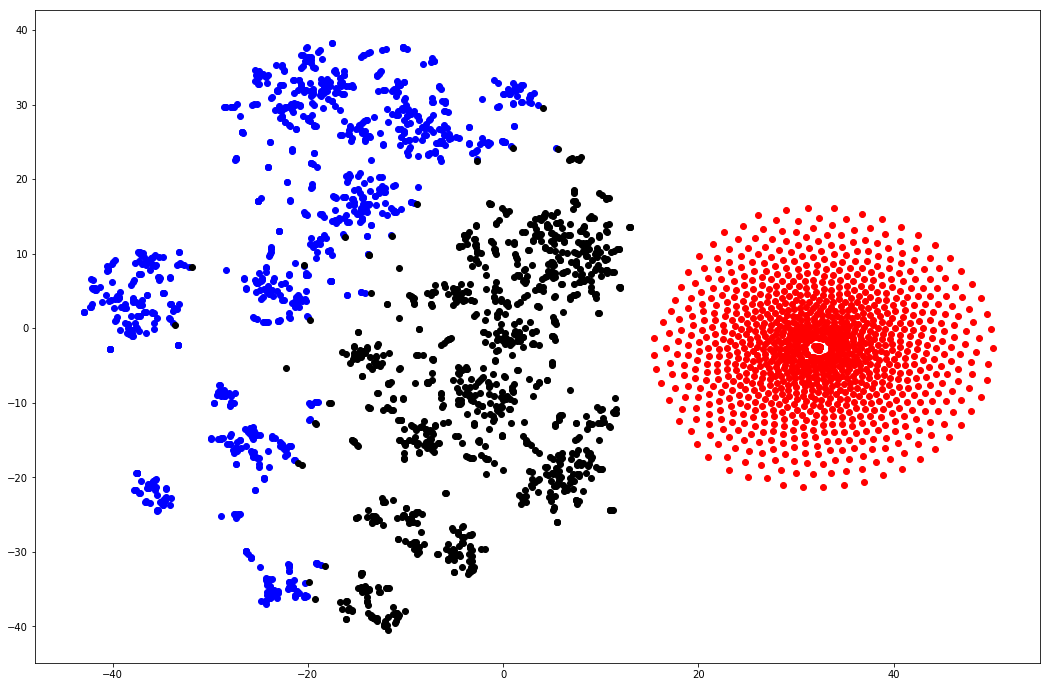

In [68]:
    plt.figure(figsize=(18, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],c=colarray[i])
    plt.show()